Basic operations in image processing

Convert color image to greyscale image using list of comprehension method and plot processing time comparison with another methods.


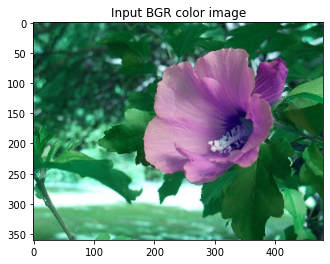

time taken for bgr to gray list of comprehension method: 0.35644960403442383


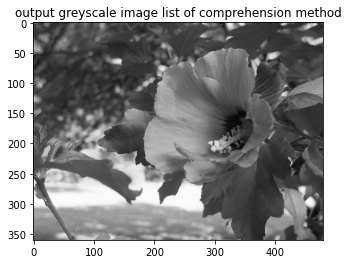

time taken for bgr to grey using for loop : 3.3255739212036133


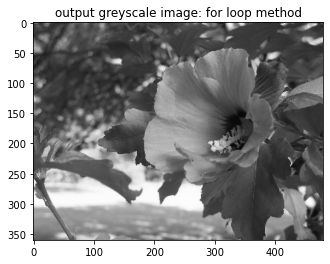

time taken for bgr to grey using cv2 library function: 0.01388692855834961


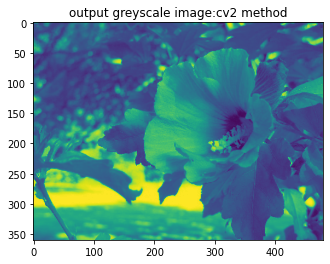

time taken for bgr to greyscale using simple mean method: 0.0


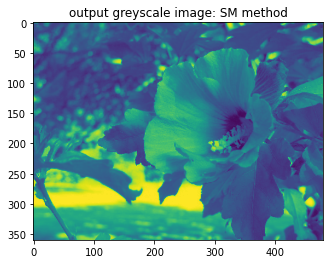

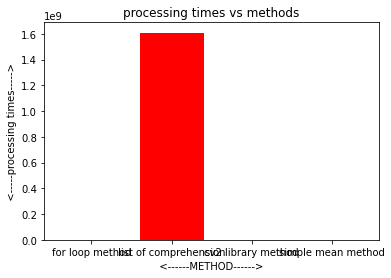

In [2]:
#method 1: list of comprehension method

import cv2
import matplotlib.pyplot as plt   
import time           
import numpy as np                                       #Importing the libraries

def loc_gbr2gray(img):    
    list=[]
    x,y,z = img.shape                                         
    img_temp=np.copy(img)
    img_temp[:,:,0]= 0.21*img[:,:,0]
    img_temp[:,:,1]= 0.71*img[:,:,1]
    img_temp[:,:,2]= 0.07*img[:,:,2]
    list.append([p[0]+p[1]+p[2] for i in range(x) for p in img_temp[i]])
    new= np.asarray(list, dtype=np.uint8)
    new = np.reshape(new, [x,y])    
    return new

img= cv2.imread('C:\\Users\mayan\Downloads\Rose.jpg')    #Importing the image
plt.imshow(img)
plt.title('Input BGR color image')
plt.show()
t1=time.time()
new=loc_gbr2gray(img)
t_loc=time.time()
print("time taken for bgr to gray list of comprehension method:", t_loc - t1)
cv2.imwrite('C:\\Users\mayan\Downloads\greyscale_rose.jpg',new)
imggr = cv2.imread('C:\\Users\mayan\Downloads\greyscale_rose.jpg')
plt.imshow(imggr)
plt.title('output greyscale image list of comprehension method')
plt.show()    
    
    



# Method 2: using for loops , formula used for converting : intensity = 0.21*r + 0.71*g + 0.07*b
prop = img.shape
t2=time.time()
for i in range(prop[0]):
    for j in range( prop[1]):
        img[i][j] = 0.07*img[i][j][2] + 0.71*img[i][j][1] + 0.21*img[i][j][0]
t3=time.time()
t_forloop=t3-t2
print("time taken for bgr to grey using for loop :",t_forloop)
cv2.imwrite('C:\\Users\mayan\Downloads\greyscale_rose.jpg',img)
plt.imshow(img)
plt.title('output greyscale image: for loop method')
plt.show()

# Method 3: using library function: cv2.COLOR_BGR2GREY
t4=time.time()
grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
t5=time.time()
t_cv2=t5-t4
print("time taken for bgr to grey using cv2 library function:",t_cv2)
plt.imshow(grey_img)
plt.title('output greyscale image:cv2 method')
plt.show()

#method 3: simple mean method
t6=time.time()
img_sm=np.mean(img,axis=2)
t7=time.time()
t_mean=t7-t6
print("time taken for bgr to greyscale using simple mean method:",t_mean)
plt.imshow(img_sm)
plt.title('output greyscale image: SM method')
plt.show()

#Comparing processing times of different methods for bgr to gray scale conversion
x=['for loop method','list of comprehension','cv2 library method','simple mean method']
process_times=[t_forloop,t_loc,t_cv2,t_mean]
x_pos=[i for i in range(len(x))]
plt.bar(x_pos,process_times,color='red')
plt.xlabel('   <------METHOD------>   ')
plt.ylabel('   <-----processing times----->   ')
plt.title('processing times vs methods')
plt.xticks(x_pos,x)
plt.show()